# Demo IPDxIRR_2F (ionospheric plasma densities)

> Authors: Ashley Smith
>
> Abstract: Access to the derived plasma characteristics at 1Hz (level 2 product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2021-01-24T15:45:49+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.7.1
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

request = SwarmRequest()

## IPDxIRR_2F product information

Derived plasma characteristics at 1Hz, for each Swarm spacecraft.

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-2-product-definitions#IPDxIRR_2F

### Check what "IPD" data variables are available

In [3]:
request.available_collections("IPD", details=False)

{'IPD': ['SW_OPER_IPDAIRR_2F', 'SW_OPER_IPDBIRR_2F', 'SW_OPER_IPDCIRR_2F']}

In [4]:
request.available_measurements("IPD")

['Ne',
 'Te',
 'Background_Ne',
 'Foreground_Ne',
 'PCP_flag',
 'Grad_Ne_at_100km',
 'Grad_Ne_at_50km',
 'Grad_Ne_at_20km',
 'Grad_Ne_at_PCP_edge',
 'ROD',
 'RODI10s',
 'RODI20s',
 'delta_Ne10s',
 'delta_Ne20s',
 'delta_Ne40s',
 'Num_GPS_satellites',
 'mVTEC',
 'mROT',
 'mROTI10s',
 'mROTI20s',
 'IBI_flag',
 'Ionosphere_region_flag',
 'IPIR_index',
 'Ne_quality_flag',
 'TEC_STD']

## Fetch three hours of IPD data

In [5]:
request.set_collection("SW_OPER_IPDAIRR_2F")
request.set_products(measurements=request.available_measurements("IPD"))
data = request.get_between(
    dt.datetime(2014,12,21, 0),
    dt.datetime(2014,12,21, 3)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (2.273MB)


### Load and plot using pandas/matplotlib

In [6]:
df = data.as_dataframe()
df.head()

delta_Ne40s  Ionosphere_region_flag      mROT  \
Timestamp                                                                      
2014-12-21 00:00:00.197000027       3811.1                       0 -0.011013   
2014-12-21 00:00:01.197000027      16343.3                       0 -0.011013   
2014-12-21 00:00:02.197000027       3246.4                       0 -0.008833   
2014-12-21 00:00:03.197000027        848.3                       0 -0.008151   
2014-12-21 00:00:04.197000027       6448.3                       0 -0.007051   

                               Grad_Ne_at_PCP_edge  IPIR_index   Longitude  \
Timestamp                                                                    
2014-12-21 00:00:00.197000027                  0.0           7 -128.771412   
2014-12-21 00:00:01.197000027                  0.0           6 -128.772618   
2014-12-21 00:00:02.197000027                  0.0           6 -128.773822   
2014-12-21 00:00:03.197000027                  0.0           6 -128.775026   
2014-12-21 00:00:04.197000027                  0.0           6 -128.776229   

                               ROD  Grad_Ne_at_50km  Grad_Ne_at_100km  \
Timestamp                                                               
2014-12-21 00:00:00.197000027  0.0        -0.403940         -0.084919   
2014-12-21 00:00:01.197000027  0.0         0.144877         -0.144009   
2014-12-21 00:00:02.197000027  0.0        -0.123734         -0.058276   
2014-12-21 00:00:03.197000027  0.0        -0.131441         -0.144613   
2014-12-21 00:00:04.197000027  0.0        -0.403369         -0.039358   

                              Spacecraft  ...  Ne_quality_flag         Ne  \
Timestamp                                 ...                               
2014-12-21 00:00:00.197000027          A  ...            20000  1255163.2   
2014-12-21 00:00:01.197000027          A  ...            20000  1250357.6   
2014-12-21 00:00:02.197000027          A  ...            20000  1265851.3   
2014-12-21 00:00:03.197000027          A  ...            20000  1312436.8   
2014-12-21 00:00:04.197000027          A  ...            20000  1253999.0   

                               delta_Ne10s        Radius  PCP_flag  Latitude  \
Timestamp                                                                      
2014-12-21 00:00:00.197000027       67.875  6.840395e+06         0 -4.693533   
2014-12-21 00:00:01.197000027    12961.600  6.840404e+06         0 -4.757416   
2014-12-21 00:00:02.197000027        0.000  6.840413e+06         0 -4.821298   
2014-12-21 00:00:03.197000027    12393.550  6.840422e+06         0 -4.885179   
2014-12-21 00:00:04.197000027    21700.700  6.840430e+06         0 -4.949060   

                                    Te      mVTEC      RODI20s  \
Timestamp                                                        
2014-12-21 00:00:00.197000027  2212.28  51.786939  7764.002532   
2014-12-21 00:00:01.197000027  2165.19  51.768987  7181.496228   
2014-12-21 00:00:02.197000027  1544.87  51.746903  7181.496228   
2014-12-21 00:00:03.197000027  1228.50  51.728764  7390.308480   
2014-12-21 00:00:04.197000027  2681.51  51.711319  7554.331699   

                               Grad_Ne_at_20km  
Timestamp                                       
2014-12-21 00:00:00.197000027        -1.047788  
2014-12-21 00:00:01.197000027         0.338403  
2014-12-21 00:00:02.197000027         0.133643  
2014-12-21 00:00:03.197000027         1.443077  
2014-12-21 00:00:04.197000027        -1.948789  

[5 rows x 29 columns]

In [7]:
df.columns

Index(['delta_Ne40s', 'Ionosphere_region_flag', 'mROT', 'Grad_Ne_at_PCP_edge',
       'IPIR_index', 'Longitude', 'ROD', 'Grad_Ne_at_50km', 'Grad_Ne_at_100km',
       'Spacecraft', 'IBI_flag', 'RODI10s', 'TEC_STD', 'Foreground_Ne',
       'delta_Ne20s', 'mROTI20s', 'Background_Ne', 'Num_GPS_satellites',
       'mROTI10s', 'Ne_quality_flag', 'Ne', 'delta_Ne10s', 'Radius',
       'PCP_flag', 'Latitude', 'Te', 'mVTEC', 'RODI20s', 'Grad_Ne_at_20km'],
      dtype='object')

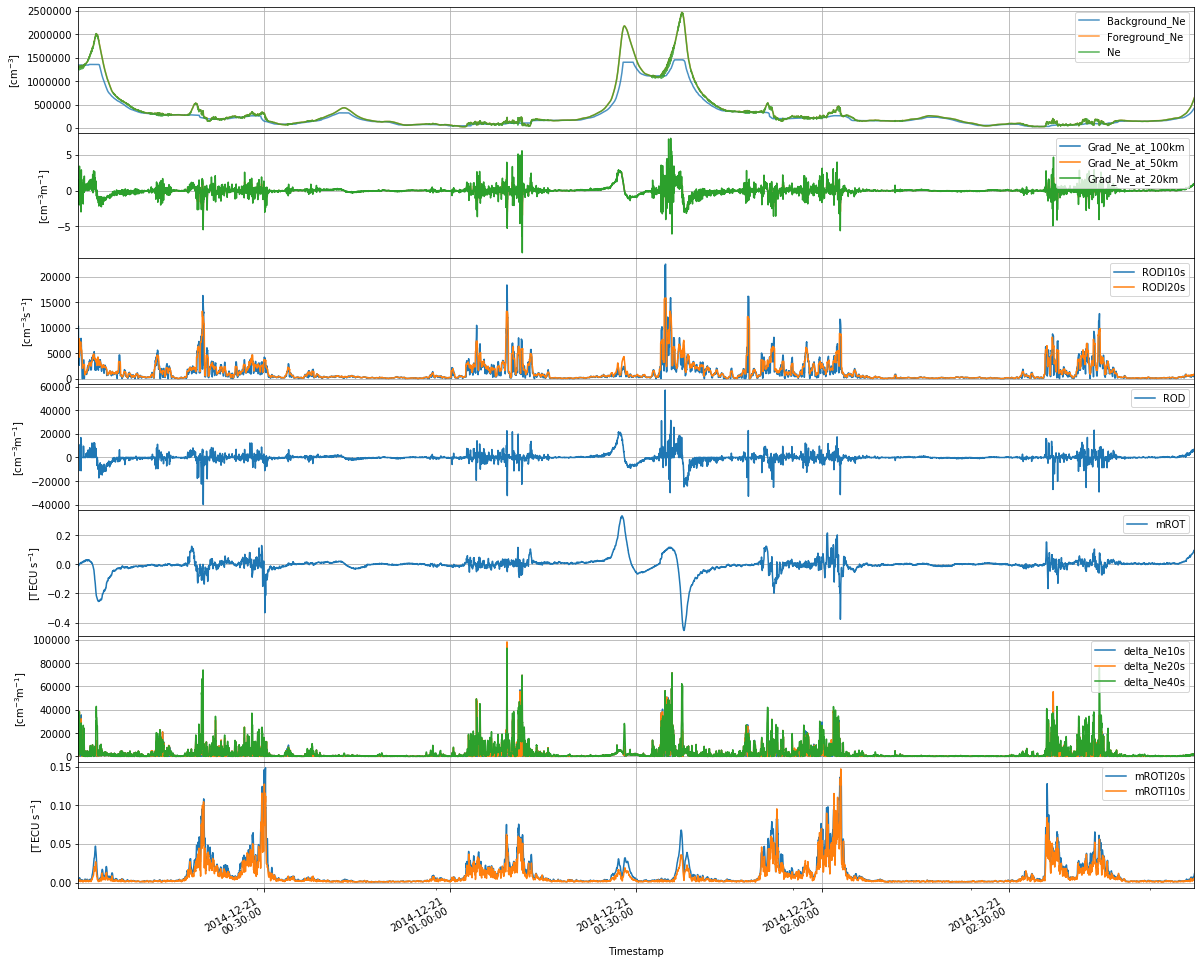

In [8]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
df.plot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'], alpha=0.8)
df.plot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
df.plot(ax=axes[2], y=['RODI10s', 'RODI20s'])
df.plot(ax=axes[3], y=['ROD'])
df.plot(ax=axes[4], y=['mROT'])
df.plot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
df.plot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
axes[0].set_ylabel("[cm$^{-3}$]")
axes[1].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[2].set_ylabel("[cm$^{-3}$s$^{-1}$]")
axes[3].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[4].set_ylabel("[TECU s$^{-1}$]")
axes[5].set_ylabel("[cm$^{-3}$m$^{-1}$]")
axes[6].set_ylabel("[TECU s$^{-1}$]")
axes[6].set_xlabel("Timestamp")

for ax in axes:
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
fig.subplots_adjust(hspace=0)

### Load as xarray

In [9]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:                 (Timestamp: 10800)
Coordinates:
  * Timestamp               (Timestamp) datetime64[ns] 2014-12-21T00:00:00.197000027 ... 2014-12-21T02:59:59.197000027
Data variables:
    Spacecraft              (Timestamp) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A'
    delta_Ne40s             (Timestamp) float64 3.811e+03 ... 1.702e+03
    Grad_Ne_at_PCP_edge     (Timestamp) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    Longitude               (Timestamp) float64 -128.8 -128.8 ... -175.4 -175.4
    ROD                     (Timestamp) float64 0.0 0.0 ... 7.28e+03 7.28e+03
    Grad_Ne_at_100km        (Timestamp) float64 -0.08492 -0.144 ... 0.9621
    RODI10s                 (Timestamp) float64 1.024e+04 3.263e+03 ... 503.7
    mROTI20s                (Timestamp) float64 0.002676 0.002732 ... 0.0114
    Num_GPS_satellites      (Timestamp) int32 4 4 4 4 4 4 4 4 ... 6 6 6 6 6 6 6
    Ne                      (Timestamp) float64 1.255e+06 1.25e+06 ... 6.468e+05
    Radius                  (Timestamp) float64 6.84e+06 6.84e+06 ... 6.835e+06
    Latitude                (Timestamp) float64 -4.694 -4.757 ... 24.74 24.68
    mVTEC                   (Timestamp) float64 51.79 51.77 ... 20.84 20.94
    RODI20s                 (Timestamp) float64 7.764e+03 7.181e+03 ... 907.9
    Grad_Ne_at_50km         (Timestamp) float64 -0.4039 0.1449 ... 0.9347 0.9775
    Grad_Ne_at_20km         (Timestamp) float64 -1.048 0.3384 ... 1.002 0.9148
    Ionosphere_region_flag  (Timestamp) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    mROT                    (Timestamp) float64 -0.01101 -0.01101 ... 0.09621
    IPIR_index              (Timestamp) int32 7 6 6 6 6 6 6 6 ... 4 4 4 4 4 4 4
    IBI_flag                (Timestamp) int32 -1 -1 -1 -1 -1 ... -1 -1 -1 -1 -1
    Foreground_Ne           (Timestamp) float64 1.305e+06 ... 6.488e+05
    delta_Ne20s             (Timestamp) float64 1.027e+04 ... 1.702e+03
    Background_Ne           (Timestamp) float64 1.344e+06 1.344e+06 ... 4.29e+05
    mROTI10s                (Timestamp) float64 0.001472 0.001386 ... 0.005609
    Ne_quality_flag         (Timestamp) int32 20000 20000 20000 ... 20000 20000
    delta_Ne10s             (Timestamp) float64 67.88 1.296e+04 ... 1.702e+03
    PCP_flag                (Timestamp) int32 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0
    Te                      (Timestamp) float64 2.212e+03 ... 1.723e+03
    TEC_STD                 (Timestamp) float64 3.131 3.122 ... 2.866 2.891
Attributes:
    Sources:         ['SW_OPER_IPDAIRR_2F_20141221T000000_20141221T235959_0301']
    MagneticModels:  []
    RangeFilters:    []

### Alternative plot setup

To plot the data from xarray, we need a different plotting setup. This does however give us more control over the plot. The units are extracted directly from the xarray object.

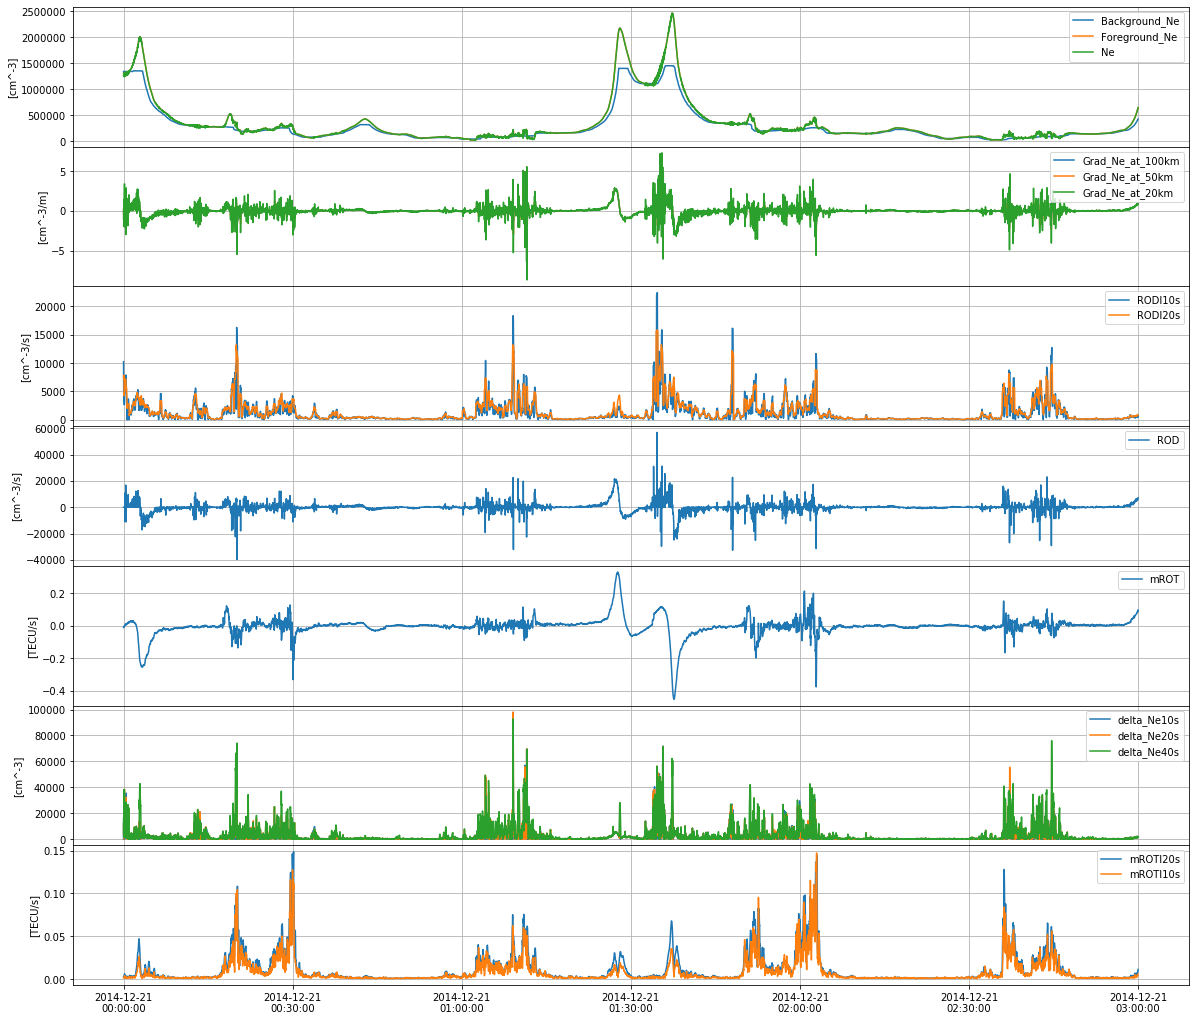

In [10]:
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(20,18), sharex=True)
def subplot(ax=None, y=None, **kwargs):
    """Plot combination of variables onto a given axis"""
    units = ds[y[0]].units
    for var in y:
        ax.plot(ds["Timestamp"], ds[var], label=var, **kwargs)
        if units != ds[var].units:
            raise ValueError(f"Units mismatch for {var}")
    ax.set_ylabel(f"[{units}]")
    # Reformat time axis
    # https://www.earthdatascience.org/courses/earth-analytics-python/use-time-series-data-in-python/customize-dates--matplotlib-plots-python/
    ax.xaxis.set_major_formatter(DateFormatter("%Y-%m-%d\n%H:%M:%S"))
    ax.legend(loc="upper right")
    ax.grid()
subplot(ax=axes[0], y=['Background_Ne', 'Foreground_Ne', 'Ne'])
subplot(ax=axes[1], y=['Grad_Ne_at_100km', 'Grad_Ne_at_50km', 'Grad_Ne_at_20km'])
subplot(ax=axes[2], y=['RODI10s', 'RODI20s'])
subplot(ax=axes[3], y=['ROD'])
subplot(ax=axes[4], y=['mROT'])
subplot(ax=axes[5], y=['delta_Ne10s', 'delta_Ne20s', 'delta_Ne40s'])
subplot(ax=axes[6], y=['mROTI20s', 'mROTI10s'])
fig.subplots_adjust(hspace=0)